<a href="https://colab.research.google.com/github/marcopenso01/Oracle/blob/main/Copy_of_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHIMERA project (oraCle fasHion Industry MarkEting stRAtegy)**

Team members: *Marco Penso, Giulia Burchianti, Denis Anta, Sonia Milazzo*

Institutional Affiliation: *ORA-FASHION Ltd*


In [ ]:
pip install jenkspy

In [ ]:
pip install mapclassify

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_string_dtype
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import jenkspy
import mapclassify
from scipy.stats import skew

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/My Drive/master

In [ ]:
ls

Customers.xlsx  Orders.xlsx  prova.xlsx


In [ ]:
data1 = pd.read_excel('Customers.xlsx')
print(data1.shape)
print(list(data1.columns))

data2 = pd.read_excel('Orders.xlsx')
print(data2.shape)
print(list(data2.columns))

In [ ]:
def descriptive_stat(data):
  d = {'Type':[], 'Valid':[], 'Missing':[], 'Range':[], 'Min':[], 'Max':[],
       'Mean':[], 'Std':[], '25%':[], '50%': [], '75%':[]}
  
  namevar= []
  for i in range(len(list(data.columns))):
    namevar.append(list(data.columns)[i])
    if is_numeric_dtype(data[list(data.columns)[i]]):
      d['Type'].append('Numeric')
      d['Valid'].append(len(data[list(data.columns)[i]]) - np.count_nonzero(np.isnan(data[list(data.columns)[i]])))
      d['Missing'].append(np.count_nonzero(np.isnan(data[list(data.columns)[i]])))
      x = data[list(data.columns)[i]][~np.isnan(data[list(data.columns)[i]])]
      min = x.min()
      max = x.max()
      d['Range'].append(max-min)
      d['Min'].append(min)
      d['Max'].append(max)
      d['Mean'].append(round(np.mean(x),2))
      d['Std'].append(round(np.std(x),3))
      d['25%'].append(np.percentile(x, 25))
      d['50%'].append(np.percentile(x, 50))
      d['75%'].append(np.percentile(x, 75))
    elif is_string_dtype(data[list(data.columns)[i]]):
      d['Type'].append('String')
      count_nan=0
      for n in range(len(data[list(data.columns)[i]])):
        if type(data[list(data.columns)[i]][n]) != str:
          if np.isnan(data[list(data.columns)[i]][n]):
            count_nan+=1
      d['Valid'].append(len(data[list(data.columns)[i]])-count_nan)
      d['Missing'].append(count_nan)
      d['Range'].append('/')
      d['Min'].append('/')
      d['Max'].append('/')
      d['Mean'].append('/')
      d['Std'].append('/')
      d['25%'].append('/')
      d['50%'].append('/')
      d['75%'].append('/')
    elif pd.core.dtypes.common.is_datetime_or_timedelta_dtype(data[list(data.columns)[i]]):
      d['Type'].append('Date')
      count=0
      count_nan=0
      for n in range(len(data[list(data.columns)[i]])):
        if isinstance(data[list(data.columns)[i]][n], datetime.datetime):
          count+=1
        else:
          if type(data[list(data.columns)[i]][n]) != str:
            if np.isnan(data[list(data.columns)[i]][n]):
              count_nan+=1
      d['Valid'].append(count)
      d['Missing'].append(count_nan)
      d['Range'].append((data2['Date'].max()-data2['Date'].min()).days)
      d['Min'].append(data[list(data.columns)[i]].min().strftime("%Y-%m-%d"))
      d['Max'].append(data[list(data.columns)[i]].max().strftime("%Y-%m-%d"))
      d['Mean'].append('/')
      d['Std'].append('/')
      d['25%'].append('/')
      d['50%'].append('/')
      d['75%'].append('/')

  df = pd.DataFrame(data=d)
  df.index = namevar
  return df

def frequencies(data, namevar):
  '''
  namevar= []
  for i in range(len(list(data.columns))):
      flag=True
      while flag:
          print('Select variables for analysis - press 1 to select, 0 otherwise')
          c = input("Enter a command for %s: " % list(data.columns)[i])
          if c == '1' or c == '0':
            flag=False
            if c == '1':
              namevar.append(list(data.columns)[i])
          else:
            print('invalid input, try again')
  print('\n')
  '''
  for i in namevar:
    category = []
    tot = 0
    d = {'Frequency':[], 'Percent':[]}
    freq_nan = 0
    for var in np.unique(data[i].astype(str)):
      if type(var) != str and np.isnan(var):
        freq_nan += np.count_nonzero(np.isnan(data[i]))
      else:
        category.append(var)
        freq = len(np.where(data[i]==var)[0][:])
        d['Frequency'].append(freq)
        d['Percent'].append(round(freq*100/len(data[i]),1))
        tot += freq
    category.append('Total')
    d['Frequency'].append(tot)
    d['Percent'].append(100.0)
    category.append('Missing')
    d['Frequency'].append(freq_nan)
    d['Percent'].append(round(freq_nan*100/len(data[i]),1))
    df = pd.DataFrame(data=d)
    df.index = category
    df = df.style.set_caption(i)
    df = df.format({'Percent': "{:.1f}"})
    display(df)
    print('\n')
    if len(category) <= 10:
      values = d['Frequency'][0:-2]
      names = category[0:-2]
      fig, ax = plt.subplots()
      ax.bar(names, values)
      ax.title.set_text(i)
      ax.set_xlabel('Categories')
      ax.set_ylabel('Frequency')
      plt.show()
      print('\n')
      fig, ax = plt.subplots();
      ax.pie(values, labels=names, autopct='%1.1f%%');
      plt.show()
      print('\n')

      
    print('\n')

def geo_analysis(data):
  category=[]
  d = {'N_customer':[], 'M':[], 'F':[], 'Age_range':[], 'Age_min':[], 'Age_max':[], 
       'Age_mean':[], 'Age_std':[]}
  for var in np.unique(data['GEOGRAPHY'].astype(str)):
    category.append(var)
    n_cust = len(data[data['GEOGRAPHY']==var])
    d['N_customer'].append(n_cust)
    n_male = len(np.where(data[data['GEOGRAPHY']==var]['GENDER']=='M')[0])
    n_female = n_cust - n_male
    d['M'].append(str(n_male)+str(' (')+str(round(n_male*100/n_cust,1))+str('%)'))
    d['F'].append(str(n_female)+str(' (')+str(round(n_female*100/n_cust,1))+str('%)'))
    a_min = data[data['GEOGRAPHY']==var]['AGE'].min()
    a_max = data[data['GEOGRAPHY']==var]['AGE'].max()
    d['Age_min'].append(a_min)
    d['Age_max'].append(a_max)
    d['Age_range'].append(a_max-a_min)
    d['Age_mean'].append(round(np.mean(data[data['GEOGRAPHY']==var]['AGE']),1))
    d['Age_std'].append(round(np.std(data[data['GEOGRAPHY']==var]['AGE']),1))
  df = pd.DataFrame(data=d)
  df.index = category
  return df

def purchases(data):
  category=[]
  d = {'N_customer':[], 'M':[], 'F':[], 'Tot_purchases':[], 'Mean_purchases':[],
       'Median_purchases':[], 'Max_purchases':[], 'Min_purchases':[]}
  for var in np.unique(data['Age']):
    category.append(var)
    n_purch = len(data[data['Age']==var])
    d['Tot_purchases'].append(n_purch)
    n_cust = len(np.unique(data[data['Age']==var]['Customer_ID']))
    d['N_customer'].append(n_cust)

    n_male=0
    n_female=0
    for i in np.unique(data[data['Age']==var]['Customer_ID']):
      pos = np.where(data[data['Age']==var]['Customer_ID']==i)[0][0]
      if data[data['Age']==var].iloc[pos]['Gender'] =='M':
        n_male +=1
      else:
        n_female +=1
    d['M'].append(str(n_male)+str(' (')+str(round(n_male*100/n_cust,1))+str('%)'))
    d['F'].append(str(n_female)+str(' (')+str(round(n_female*100/n_cust,1))+str('%)'))

    d['Mean_purchases'].append(round(n_purch/n_cust,1))
    acq = []
    for i in np.unique(data[data['Age']==var]['Customer_ID']):
      acq.append(len(np.where(data[data['Age']==var]['Customer_ID']==i)[0]))
    d['Median_purchases'].append(round(np.median(acq),1))
    d['Max_purchases'].append(max(acq))
    d['Min_purchases'].append(min(acq))
  df = pd.DataFrame(data=d)
  df.index = category
  df = df.style.set_caption('AGE')
  df = df.format('{:.1f}', subset=['Median_purchases','Mean_purchases'])
  display(df)
  print('\n')
  values = d['N_customer']
  names = category
  fig, ax = plt.subplots()
  ax.bar(names, values)
  ax.title.set_text('AGE')
  ax.set_xlabel('Age')
  ax.set_ylabel('Frequency')

  print('\n\n')

  category=[]
  d = {'N_customer':[], 'M':[], 'F':[], 'Tot_purchases':[], 'Mean_purchases':[],
       'Median_purchases':[], 'Max_purchases':[], 'Min_purchases':[]}
  for var in np.unique(data['Geography']):
    category.append(var)
    n_purch = len(data[data['Geography']==var])
    d['Tot_purchases'].append(n_purch)
    n_cust = len(np.unique(data[data['Geography']==var]['Customer_ID']))
    d['N_customer'].append(n_cust)

    n_male=0
    n_female=0
    for i in np.unique(data[data['Geography']==var]['Customer_ID']):
      pos = np.where(data[data['Geography']==var]['Customer_ID']==i)[0][0]
      if data[data['Geography']==var].iloc[pos]['Gender'] =='M':
        n_male +=1
      else:
        n_female +=1
    d['M'].append(str(n_male)+str(' (')+str(round(n_male*100/n_cust,1))+str('%)'))
    d['F'].append(str(n_female)+str(' (')+str(round(n_female*100/n_cust,1))+str('%)'))

    d['Mean_purchases'].append(round(n_purch/n_cust,1))
    acq = []
    for i in np.unique(data[data['Geography']==var]['Customer_ID']):
      acq.append(len(np.where(data[data['Geography']==var]['Customer_ID']==i)[0]))
    d['Median_purchases'].append(round(np.median(acq),1))
    d['Max_purchases'].append(max(acq))
    d['Min_purchases'].append(min(acq))
  df = pd.DataFrame(data=d)
  df.index = category
  df = df.style.set_caption('GEOGRAPHY')
  df = df.format('{:.1f}', subset=['Median_purchases','Mean_purchases'])
  display(df)

  print('\n\n')
  category=[]
  d = {'N_customer':[], 'M':[], 'F':[], 'Tot_purchases':[], 'Mean_purchases':[],
       'Median_purchases':[], 'Max_purchases':[], 'Min_purchases':[]}
  for var in ['Spring', 'Summer', 'Fall', 'Winter','Christmas','Easter','New Year','Women Day','Epiphany','German Unity Day']:
    category.append(var)
    if var == 'Spring':
      db = data[data['Month'].isin([3,4,5])]
    elif var == 'Summer':
      db = data[data['Month'].isin([6,7,8])]
    elif var == 'Fall':
      db = data[data['Month'].isin([9,10,11])]
    elif var == 'Winter':
      db = data[data['Month'].isin([12,1,2])]
    elif var == 'Christmas':
      db = data[data['Month'].isin([12]) & data['Day'].isin([25])]
    elif var == 'Easter':
      db = data[data['Month'].isin([4]) & data['Day'].isin([10])]
    elif var == 'New Year':
      db = data[data['Month'].isin([1]) & data['Day'].isin([1])]
    elif var == 'Women Day':
      db = data[data['Month'].isin([3]) & data['Day'].isin([8])]
    elif var == 'Epiphany':
      db = data[data['Month'].isin([1]) & data['Day'].isin([6])]
    elif var == 'German Unity Day':
      db = data[data['Month'].isin([10]) & data['Day'].isin([3])]
    
    n_purch = len(db)
    d['Tot_purchases'].append(n_purch)
    n_cust = len(np.unique(db['Customer_ID']))
    d['N_customer'].append(n_cust)

    n_male=0
    n_female=0
    for i in np.unique(db['Customer_ID']):
      pos = np.where(db['Customer_ID']==i)[0][0]
      if db.iloc[pos]['Gender'] =='M':
        n_male +=1
      else:
        n_female +=1
    if n_male != 0:
      d['M'].append(str(n_male)+str(' (')+str(round(n_male*100/n_cust,1))+str('%)'))
    else:
      d['M'].append(0)
    if n_female != 0:
      d['F'].append(str(n_female)+str(' (')+str(round(n_female*100/n_cust,1))+str('%)'))
    else:
      d['F'].append(0)

    if n_cust != 0:
      d['Mean_purchases'].append(round(n_purch/n_cust,1))
    else:
      d['Mean_purchases'].append(0)
    acq = []
    for i in np.unique(db['Customer_ID']):
      acq.append(len(np.where(db['Customer_ID']==i)[0]))
    if len(acq) != 0:
      d['Median_purchases'].append(round(np.median(acq),1))
      d['Max_purchases'].append(max(acq))
      d['Min_purchases'].append(min(acq))
    else:
      d['Median_purchases'].append(0)
      d['Max_purchases'].append(0)
      d['Min_purchases'].append(0)
  df = pd.DataFrame(data=d)
  df.index = category
  df = df.style.set_caption('SEASON')
  df = df.format('{:.1f}', subset=['Median_purchases','Mean_purchases'])
  display(df)

In [ ]:
descriptive_stat(data1)

,Type,Valid,Missing,Range,Min,Max,Mean,Std,25%,50%,75%
Customer_ID,Numeric,22625,0,22624,1,22625,11313.0,6531.275,5657.0,11313.0,16969.0
GENDER,String,22625,0,/,/,/,/,/,/,/,/
AGE,Numeric,22625,0,57,18,75,37.92,12.226,29.0,38.0,46.0
GEOGRAPHY,String,22625,0,/,/,/,/,/,/,/,/


In [ ]:
descriptive_stat(data2)

,Type,Valid,Missing,Range,Min,Max,Mean,Std,25%,50%,75%
id,Numeric,131706,0,131705,1,131706,65853.5,38020.247,32927.25,65853.5,98779.75
Date,Date,131706,0,363,2021-01-02,2021-12-31,/,/,/,/,/
Customer_ID,Numeric,131706,0,22624,1,22625,12386.45,6086.424,7349.0,13496.0,17306.0
Transaction_ID,Numeric,131706,0,64681,1,64682,32389.6,18709.83,16134.0,32620.0,48548.0
SKU_Category,String,131706,0,/,/,/,/,/,/,/,/
SKU,String,131706,0,/,/,/,/,/,/,/,/
Quantity,Numeric,131706,0,399.99,0.01,400.0,1.49,3.873,1.0,1.0,1.0
Sales_Amount,Numeric,131706,0,707.71,0.02,707.73,11.98,19.36,4.23,6.92,12.33


,Frequency,Percent
F,11328,50.1
M,11297,49.9
Total,22625,100.0
Missing,0,0.0


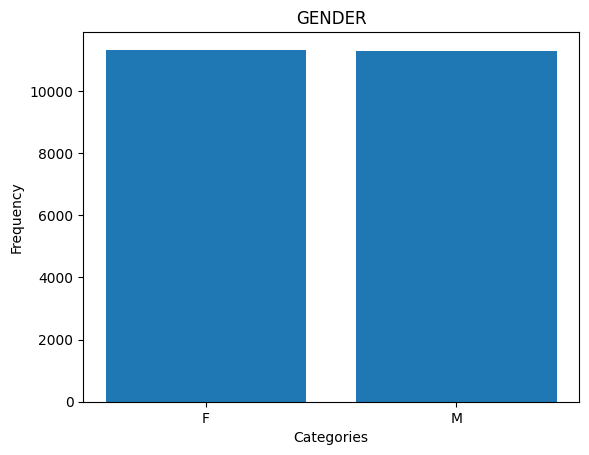

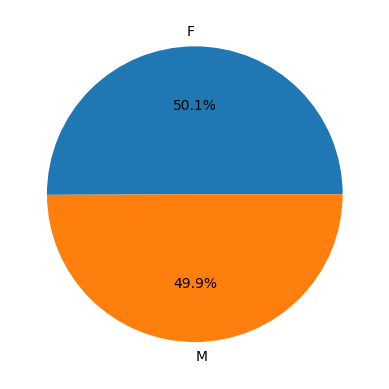

,Frequency,Percent
France,2644,11.7
Germany,7970,35.2
Greece,2269,10.0
Italy,4480,19.8
Netherlands,1347,6.0
Spain,1651,7.3
UK,2264,10.0
Total,22625,100.0
Missing,0,0.0


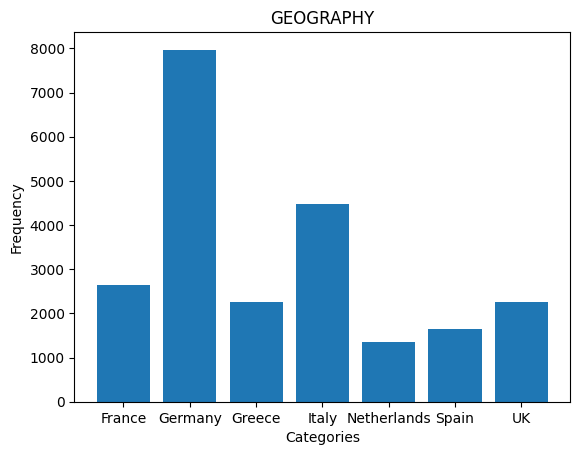

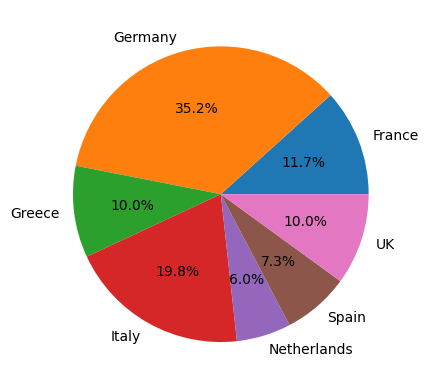

In [ ]:
frequencies(data1, ['GENDER', 'GEOGRAPHY'])

In [ ]:
frequencies(data2, ['SKU_Category'])

,Frequency,Percent
01F,2158,1.6
06Z,209,0.2
0H2,4500,3.4
0KX,460,0.3
0WT,673,0.5
10Y,52,0.0
144,0,0.0
1EO,1120,0.9
1L6,630,0.5
1R3,18,0.0


In [ ]:
geo_analysis(data1)

,N_customer,M,F,Age_range,Age_min,Age_max,Age_mean,Age_std
France,2644,0 (0.0%),2644 (100.0%),4,39,43,41.2,1.2
Germany,7970,6817 (85.5%),1153 (14.5%),12,27,39,33.2,3.6
Greece,2269,0 (0.0%),2269 (100.0%),8,50,58,53.7,2.1
Italy,4480,4480 (100.0%),0 (0.0%),9,18,27,21.2,3.0
Netherlands,1347,0 (0.0%),1347 (100.0%),17,58,75,63.2,4.5
Spain,1651,0 (0.0%),1651 (100.0%),3,47,50,48.7,1.0
UK,2264,0 (0.0%),2264 (100.0%),4,43,47,45.1,1.2


In [ ]:
gender=[]
age=[]
geo=[]
year=[]
month=[]
day=[]
for i in range(len(data2['Customer_ID'])):
  ind = np.where(data1['Customer_ID']==data2['Customer_ID'][i])[0][0]
  gender.append(data1['GENDER'][ind])
  age.append(data1['AGE'][ind])
  geo.append(data1['GEOGRAPHY'][ind])

df = pd.read_excel('Orders.xlsx')
df['Gender'] = gender
df['Age'] = age
df['Geography'] = geo

for i in range(len(df)):
  year.append(int(df['Date'][i].strftime("%Y")))
  month.append(int(df['Date'][i].strftime("%m")))
  day.append(int(df['Date'][i].strftime("%d")))

df['Year'] = year
df['Month'] = month
df['Day'] = day

**Derive average, median, maximum, minimum and possible peak purchases by age,
geographic area and seasonality (e g holidays)**

,N_customer,M,F,Tot_purchases,Mean_purchases,Median_purchases,Max_purchases,Min_purchases
18,1607,1607 (100.0%),0 (0.0%),9238,5.7,3.0,92,1
19,275,275 (100.0%),0 (0.0%),1463,5.3,3.0,70,1
20,273,273 (100.0%),0 (0.0%),1509,5.5,3.0,97,1
21,302,302 (100.0%),0 (0.0%),1880,6.2,3.0,90,1
22,343,343 (100.0%),0 (0.0%),1958,5.7,3.0,73,1
23,371,371 (100.0%),0 (0.0%),1830,4.9,3.0,83,1
24,402,402 (100.0%),0 (0.0%),2398,6.0,3.0,67,1
25,421,421 (100.0%),0 (0.0%),2349,5.6,3.0,128,1
26,461,461 (100.0%),0 (0.0%),2678,5.8,3.0,131,1
27,469,469 (100.0%),0 (0.0%),2980,6.4,3.0,125,1


,N_customer,M,F,Tot_purchases,Mean_purchases,Median_purchases,Max_purchases,Min_purchases
France,2644,0 (0.0%),2644 (100.0%),15409,5.8,3.0,179,1
Germany,7970,6817 (85.5%),1153 (14.5%),46790,5.9,3.0,165,1
Greece,2269,0 (0.0%),2269 (100.0%),13162,5.8,3.0,228,1
Italy,4480,4480 (100.0%),0 (0.0%),25497,5.7,3.0,131,1
Netherlands,1347,0 (0.0%),1347 (100.0%),7374,5.5,3.0,114,1
Spain,1651,0 (0.0%),1651 (100.0%),10034,6.1,3.0,218,1
UK,2264,0 (0.0%),2264 (100.0%),13440,5.9,3.0,222,1


,N_customer,M,F,Tot_purchases,Mean_purchases,Median_purchases,Max_purchases,Min_purchases
Spring,9946,4960 (49.9%),4986 (50.1%),34310,3.4,2.0,68,1
Summer,7388,3717 (50.3%),3671 (49.7%),30046,4.1,2.0,101,1
Fall,8470,4249 (50.2%),4221 (49.8%),34406,4.1,2.0,60,1
Winter,9749,4863 (49.9%),4886 (50.1%),32944,3.4,2.0,77,1
Christmas,0,0,0,0,0.0,0.0,0,0
Easter,122,57 (46.7%),65 (53.3%),205,1.7,1.0,9,1
New Year,0,0,0,0,0.0,0.0,0,0
Women Day,172,83 (48.3%),89 (51.7%),406,2.4,2.0,11,1
Epiphany,110,55 (50.0%),55 (50.0%),178,1.6,1.0,8,1
German Unity Day,198,95 (48.0%),103 (52.0%),465,2.3,2.0,13,1


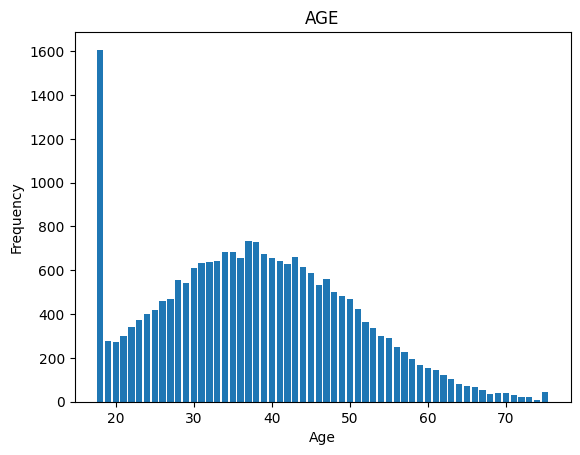

In [ ]:
purchases(df)

**RFM analysis (recency, frequency, monetary)**

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers.

In [ ]:
def quartile_rank(array, n_clas, option, ascending=True):
    if option == 1:
      x = np.array([(min(array)+(i*(max(array)-min(array))/n_clas)) for i in range(n_clas)])
    elif option == 2:
      perc_arr= [round((1/n_clas)*i,2) for i in range(n_clas)]
      x = np.quantile(array,perc_arr)
    elif option == 3:
      mp = mapclassify.NaturalBreaks(array, k=n_clas)
      x = np.array([round(mp.bins[i],1) for i in range(n_clas-1)])
      x = np.insert(x,0,min(array))
    elif option == 4:
      mp = mapclassify.FisherJenks(array, k=n_clas)
      x = np.array([round(mp.bins[i],1) for i in range(n_clas-1)])
      x = np.insert(x,0,min(array))
    
    if option >= 3:
      for i in range(len(x)-1):
        if x[i+1] == x[i]:
          x[i+1] = x[i+1]+0.1

    if ascending:
      rank = np.array([np.count_nonzero(value >= x) for value in array])
    else:
      rank = np.array([np.count_nonzero(value < x)+1 for value in array])
    return rank, x


def numConcat(num1, num2, num3):
    # Convert the numbers to strings
    num1 = str(num1)
    num2 = str(num2)
    num3 = str(num3)
    # Concatenate the strings
    num1 += num2
    num1 += num3  
    return int(num1)

def segments(num1, num2, num3, bins):
    '''
    :param num1: R score
    :param num2: F score
    :param num3: M score
    :param bins: Number of groups for each distribution of values
    '''
    if num1 == num2 == num3 == bins:
      return 'Best Customers'
    elif num1 == 2 and num2 == num3 == bins:
      return 'Almost Lost'
    elif num1 == 1 and num2 == num3 == bins:
      return 'Lost Customers'
    elif num1 == 1 and num2<=2 and num3<=2:
      return 'Lost Cheap Customers'
    elif num1 == bins:
      return 'Recent Customers'
    elif num2 == bins:
      return 'Loyal Custormes'
    elif num3 == bins:
      return 'Big Spenders'
    else:
      return 'Others'
   
def RFM_analysis(data, r_var=str, f_var=str, m_var=str, sum_tot_val=True, bins=4, option=1, r_tran=None, f_tran=None, m_tran=None):
  '''
  RFM Function analysis for customer segmentation. It will divide customers 
  into groups according to the distribution of values for recency, frequency, 
  and monetary value.  
  :param data: Dataframe 
  :param r_var: Name of the variable to use for recency value (Time since last purchase)
  :param f_var: Name of the variable to use for frequancy value (Total number of purchases)
  :param m_var: Name of the variable to use for monetary value (Total monetary value)
  :param sum_tot_val: Sum (true) or average (false) for the total value of orders
  :param bins: Number of partitions of the histogram (default =4)
  :param option: set the custom class ranges
                 1: Equal interval
                 2: Percentile
                 3: Natural breaks (Jenks)
                 4: Fisher Jenks
  :param r_tran: transformation for the R histogram distribution
                 None: no transformation (default)
                 1: Cube root transformation
                 2: Square root transformation
                 3: Logarithm transformation
  :param f_tran: transformation for the F histogram distribution
                 None: no transformation (default)
                 1: Cube root transformation
                 2: Square root transformation
                 3: Logarithm transformation
  :param m_tran: transformation for the M histogram distribution
                 None: no transformation (default)
                 1: Cube root transformation
                 2: Square root transformation
                 3: Logarithm transformation
  :return: Dataframe with curstomer's RFM score
  '''
  if option > 4:
    raise Exception("Invalid option number")
  if r_tran != None and r_tran > 3:
    raise Exception("Invalid transformation for R distribution") 
  if f_tran != None and f_tran > 3:
    raise Exception("Invalid transformation for F distribution")
  if m_tran != None and m_tran > 3:
    raise Exception("Invalid transformation for M distribution")

  d = {'ID':[], 'TotalAmount':[], 'T_TotalAmount':[], 'MostRecent':[], 
       'T_MostRecent':[], 'NumberOfPurchases':[], 'T_NumberOfPurchases':[]}
  p = {'P_Recency':[], 'P_Frequency':[], 'P_Monetary':[]}

  for id in np.unique(data['Customer_ID']):
    d['ID'].append(id)
    d['MostRecent'].append((pd.Timestamp('2021-12-31T00')-max(data[data['Customer_ID']==id][r_var])).days)
    d['NumberOfPurchases'].append(len(np.unique(data[data['Customer_ID']==id][f_var])))
    if sum_tot_val:
      d['TotalAmount'].append(np.sum(data[data['Customer_ID']==id][m_var]))
    else:
      d['TotalAmount'].append(np.average(np.array([np.sum(data[(data['Customer_ID']==id) & (df['Transaction_ID']==trans)][m_var]) for trans in np.unique(df[df['Customer_ID']==id]['Transaction_ID'])])))

  # Transforming Skewed Data
  if r_tran:
    d['T_MostRecent'] = np.array(d['MostRecent'])
  else:
    del d['T_MostRecent']
  if f_tran:
    d['T_NumberOfPurchases'] = np.array(d['NumberOfPurchases'])
  else:
    del d['T_NumberOfPurchases']
  if m_tran:
    d['T_TotalAmount'] = np.array(d['TotalAmount'])
  else:
    del d['T_TotalAmount']

  if r_tran == 1:
    np.cbrt(d['T_MostRecent'], out=d['T_MostRecent'])
  if f_tran == 1:
    np.cbrt(d['T_NumberOfPurchases'], out=d['T_NumberOfPurchases'])
  if m_tran == 1:
    np.cbrt(d['T_TotalAmount'], out=d['T_TotalAmount'])
  if r_tran == 2:
    np.sqrt(d['T_MostRecent'], out=d['T_MostRecent'])
  if f_tran == 2:
    np.sqrt(d['T_NumberOfPurchases'], out=d['T_NumberOfPurchases'])
  if m_tran == 2:
    np.sqrt(d['T_TotalAmount'], out=d['T_TotalAmount'])
  if r_tran == 3:
    d['T_MostRecent'] = np.where(d['T_MostRecent'] > 1e-7, d['T_MostRecent'], 1e-7)
    np.log(d['T_MostRecent'], out=d['T_MostRecent'])
  if f_tran == 3:
    d['T_NumberOfPurchases'] = np.where(d['T_NumberOfPurchases'] > 1e-7, d['T_NumberOfPurchases'], 1e-7)
    np.log(d['T_NumberOfPurchases'], out=d['T_NumberOfPurchases'])
  if m_tran == 3:
    d['T_TotalAmount'] = np.where(d['T_TotalAmount'] > 1e-7, d['T_TotalAmount'], 1e-7)
    np.log(d['T_TotalAmount'], out=d['T_TotalAmount'])
  
  if r_tran:
    np.round(d['T_MostRecent'],decimals=2, out=d['T_MostRecent'])
  if f_tran:
    np.round(d['T_NumberOfPurchases'],decimals=2, out=d['T_NumberOfPurchases'])
  if m_tran:
    np.round(d['T_TotalAmount'],decimals=2, out=d['T_TotalAmount'])


  d['Recency'],  p['P_Recency'] = quartile_rank(d['T_MostRecent'] if r_tran else d['MostRecent'], bins, option, ascending=False)
  d['Frequency'], p['P_Frequency'] = quartile_rank(d['T_NumberOfPurchases'] if f_tran else d['NumberOfPurchases'], bins, option)
  d['Monetary'], p['P_Monetary'] = quartile_rank(d['T_TotalAmount'] if m_tran else d['TotalAmount'], bins, option)

  p['P_Recency'] = np.append(p['P_Recency'], max(d['T_MostRecent']) if r_tran else max(d['MostRecent']))
  p['P_Frequency'] = np.append(p['P_Frequency'], max(d['T_NumberOfPurchases']) if f_tran else max(d['NumberOfPurchases']))
  p['P_Monetary'] = np.append(p['P_Monetary'], max(d['T_TotalAmount']) if m_tran else max(d['TotalAmount']))

  d['RFM_score'] = [numConcat(d['Recency'][i], d['Frequency'][i], d['Monetary'][i]) for i in range(len(d['Recency']))]
  if bins==4:
    d['Segment'] = [segments(d['Recency'][i], d['Frequency'][i], d['Monetary'][i], bins) for i in range(len(d['RFM_score']))]

  df = pd.DataFrame(data=d)
  display(df)

  print('\n')
  category = ['min']
  for i in range(1, bins):
    category.append(str(i)+'°_part')
  category.append('max')
  db = pd.DataFrame(data=p)
  db.index = category
  db = db.style.set_caption('Percentile Range')
  db.format('{:.1f}')
  display(db)
  print('\n')
  
  # histogram with given partitions
  # this gives an idea if the partitioning fit data well
  hist = plt.hist(d['MostRecent'], bins=100, align='left');
  plt.close()
  sns.displot(d['T_MostRecent'] if r_tran else d['MostRecent'], kde=True, bins=100, height=3, aspect=3).set(title='MostRecent Histogram Partitioning (R)')
  for val in np.array(p['P_Recency']):
    plt.vlines(val, ymin=0, ymax = max(hist[0]), colors='red')
  for i in range(4):
    count = str(round(np.count_nonzero(d['Recency']==i+1)*100/len(d['Recency']),2))+str('%')
    plt.text((p['P_Recency'][i]+((p['P_Recency'][i+1]-p['P_Recency'][i])/2)), max(hist[0]), count)
  plt.show()
  mn = round(np.mean(d['T_MostRecent'] if r_tran else d['MostRecent']),2)
  md = round(np.median(d['T_MostRecent'] if r_tran else d['MostRecent']),2)
  sk = round(skew(d['T_MostRecent'] if r_tran else d['MostRecent']),2)
  print('%s %s Skewed Data Distribution (%.2f), Mean: %.2f, Median %.2f' % ('Highly' if abs(sk)>1 else 'Moderately', 'Positively' if mn>md else 'Negatively', sk, mn, md))

  print('\n')
  hist = plt.hist(d['NumberOfPurchases'], bins=100, align='left');
  plt.close()
  sns.displot(d['T_NumberOfPurchases'] if f_tran else d['NumberOfPurchases'], kde=True, bins=100, height=3, aspect=3).set(title='NumberOfPurchases Histogram Partitioning (F)')
  for val in np.array(p['P_Frequency']):
    plt.vlines(val, ymin=0, ymax = max(hist[0]), colors='red')
  for i in range(4):
    count = str(round(np.count_nonzero(d['Frequency']==i+1)*100/len(d['Frequency']),2))+str('%')
    plt.text((p['P_Frequency'][i]+((p['P_Frequency'][i+1]-p['P_Frequency'][i])/2)), max(hist[0]), count)
  plt.show()
  mn = round(np.mean(d['T_NumberOfPurchases'] if f_tran else d['NumberOfPurchases']),2)
  md = round(np.median(d['T_NumberOfPurchases'] if f_tran else d['NumberOfPurchases']),2)
  sk = round(skew(d['T_NumberOfPurchases'] if f_tran else d['NumberOfPurchases']),2)
  print('%s %s Skewed Data Distribution (%.2f), Mean: %.2f, Median %.2f' % ('Highly' if abs(sk)>1 else 'Moderately', 'Positively' if mn>md else 'Negatively', sk, mn, md)) 

  print('\n')
  hist = plt.hist(d['TotalAmount'], bins=100, align='left');
  plt.close()
  sns.displot(d['T_TotalAmount'] if m_tran else d['TotalAmount'], kde=True, bins=100, height=3, aspect=3).set(title='TotalAmount Histogram Partitioning (M)')
  for val in np.array(p['P_Monetary']):
    plt.vlines(val, ymin=0, ymax = max(hist[0]), colors='red')
  for i in range(4):
    count = str(round(np.count_nonzero(d['Monetary']==i+1)*100/len(d['Monetary']),2))+str('%')
    plt.text((p['P_Monetary'][i]+((p['P_Monetary'][i+1]-p['P_Monetary'][i])/2)), max(hist[0]), count)
  plt.show()
  mn = round(np.mean(d['T_TotalAmount'] if m_tran else d['TotalAmount']),2)
  md = round(np.median(d['T_TotalAmount'] if m_tran else d['TotalAmount']),2)
  sk = round(skew(d['T_TotalAmount'] if m_tran else d['TotalAmount']),2)
  print('%s %s Skewed Data Distribution (%.2f), Mean: %.2f, Median %.2f' % ('Highly' if abs(sk)>1 else 'Moderately', 'Positively' if mn>md else 'Negatively', sk, mn, md))

  # plot
  print('\n')
  ax = df['RFM_score'].value_counts().plot(kind='bar', figsize=(14, 4), fontsize=12)
  ax.title.set_text('Number of Customers (y) by RFM Score (x)')
  ax.set_xlabel("RFM Score", fontsize=12)
  ax.set_ylabel("Number of Customers", fontsize=12)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.show()
  
  print('\n')
  ax = df['NumberOfPurchases'].value_counts().plot(kind='bar', figsize=(16, 4), fontsize=12)
  ax.title.set_text('Number of Customers (y) by number of Orders (x)')
  ax.set_xlabel("Number of Orders", fontsize=12)
  ax.set_ylabel("Number of Customers", fontsize=12)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.show()

  '''
  print('\n')
  x=[]
  y=[]
  step=5
  for n in range(0,max(df['NumberOfPurchases']),step):
    x.append(str(n+1)+'-'+str(n+step))
    y.append(len(df[(df['NumberOfPurchases']>=n+1) & (df['NumberOfPurchases']<=n+step)]))
  fig, ax = plt.subplots()
  fig.set_figwidth(16)
  ax.bar(x, y)
  ax.title.set_text('Number of Customers (y) by number of Orders (x)')
  ax.set_xlabel('Number of Orders', fontsize=12)
  ax.set_ylabel('Number of Customers', fontsize=12)
  for bars in ax.containers:
      ax.bar_label(bars)
  plt.show()
  '''
  '''
  print('\n')
  db = pd.DataFrame(data=df['NumberOfPurchases'].value_counts())
  db = db.style.set_caption('Number of Customers by number of Orders')
  display(db)
  '''
  
  print('\n')
  matrix  = [[round(len(df[(df['Recency']==r+1) & (df['Frequency']==c+1)])/len(df['Frequency'])*100,1) for c in range(bins)] for r in range(bins)]
  matrix = np.array(matrix)
  labels = [i+1 for i in range(bins)]
  fig, ax = plt.subplots()
  im = ax.imshow(matrix, cmap = 'coolwarm')
  ax.set_xticks(np.arange(bins), labels=labels)
  ax.set_yticks(np.arange(bins), labels=labels)
  for i in range(bins):
      for j in range(bins):
          text = ax.text(j, i, str(matrix[i, j])+'%',
                        ha="center", va="center", color="w")
  ax.set_xlabel("Frequency Score")
  ax.set_ylabel("Recency Score")
  ax.set_title("Recency x Frequency (% of Customers)")
  plt.show()

  if bins == 4:
    print('\n')
    x=[]
    y=[]
    z=[]
    w=[]
    avr_days = []
    for seg in np.unique(df['Segment']):
      x.append(seg)
      y.append(len(df[df['Segment']==seg]))
      avr_days.append(int(round(np.average(df[df['Segment']==seg]['MostRecent']),0)))
      if seg =='Best Customers':
        z.append('No price incentives, New products and loyalty programs')
        w.append('Customers who bought most recently, most often and spend the most')
      elif seg == 'Almost Lost' or seg == 'Lost Customers':
        z.append('Agressive price incentives')
        w.append('Havent purchased for some time, but purchased frequently and spend the most')
      elif seg == 'Big Spenders':
        z.append('Market your most expensive products')
        w.append('Customers who spend the most')
      elif seg == 'Loyal Custormes':
        z.append('New products and loyalty programs')
        w.append('Customers who bought most often')
      elif seg == 'Lost Cheap Customers':
        z.append('Dont spend too much trying to re-acquire')
        w.append('Last purchase long ago, purchased few and spend little')
      elif seg == 'Recent Customers':
        z.append('Further segment analysis')   
        w.append('Customers who bought most recently')
      elif seg == 'Others':
        z.append('')   
        w.append('')  
    d = {'Segment':x, 'NumberOfCustomers':y, 'Description':w, 'Strategy':z}
    db = pd.DataFrame(data=d)
    db = db.style.set_caption('# of Customers / Segment')
    display(db)

    print('\n')
    fig, ax = plt.subplots()
    ax.barh(np.arange(len(x)), avr_days)
    ax.set_yticks(np.arange(len(x)), labels=x)
    ax.invert_yaxis()
    ax.set_xlabel("Average Recency days")
    ax.set_title("Average Recency (days since last purchase)")
    plt.show()

  return df

,ID,TotalAmount,T_TotalAmount,MostRecent,NumberOfPurchases,T_NumberOfPurchases,Recency,Frequency,Monetary,RFM_score,Segment
0,1,16.29,2.79,343,1,0.00,1,1,2,112,Lost Cheap Customers
1,2,22.77,3.13,195,2,0.69,2,2,2,222,Others
2,3,10.92,2.39,363,1,0.00,1,1,2,112,Lost Cheap Customers
3,4,33.29,3.51,52,2,0.69,4,2,3,423,Recent Customers
4,5,78.82,4.37,179,5,1.61,2,3,3,233,Others
...,...,...,...,...,...,...,...,...,...,...,...
22620,22621,9.69,2.27,21,1,0.00,4,1,2,412,Recent Customers
22621,22622,6.07,1.80,15,1,0.00,4,1,1,411,Recent Customers
22622,22623,128.01,4.85,10,1,0.00,4,1,4,414,Recent Customers
22623,22624,19.60,2.98,29,1,0.00,4,1,2,412,Recent Customers


,P_Recency,P_Frequency,P_Monetary
min,0.0,0.0,-2.0
1°_part,69.0,0.1,2.2
2°_part,164.0,1.1,3.4
3°_part,263.0,2.1,4.8
max,363.0,4.6,8.3


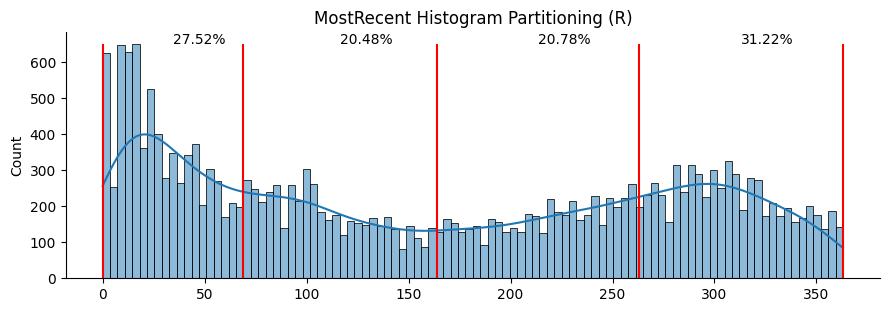

Moderately Positively Skewed Data Distribution (0.14), Mean: 160.96, Median 149.00




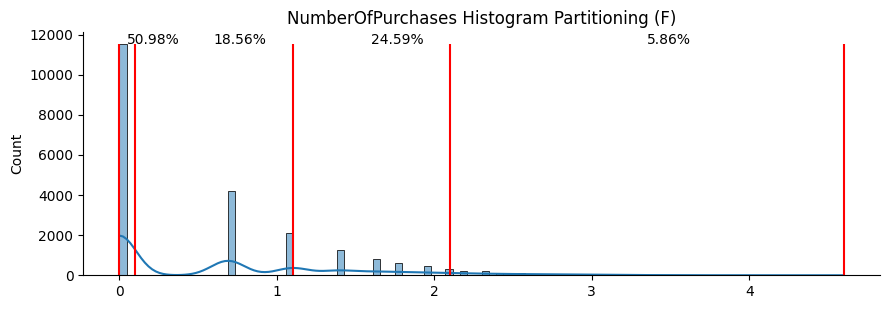

Highly Positively Skewed Data Distribution (1.15), Mean: 0.64, Median 0.00




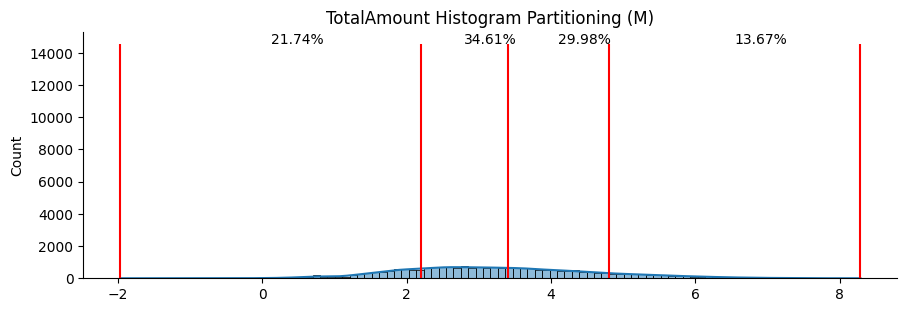

Moderately Positively Skewed Data Distribution (0.34), Mean: 3.28, Median 3.17




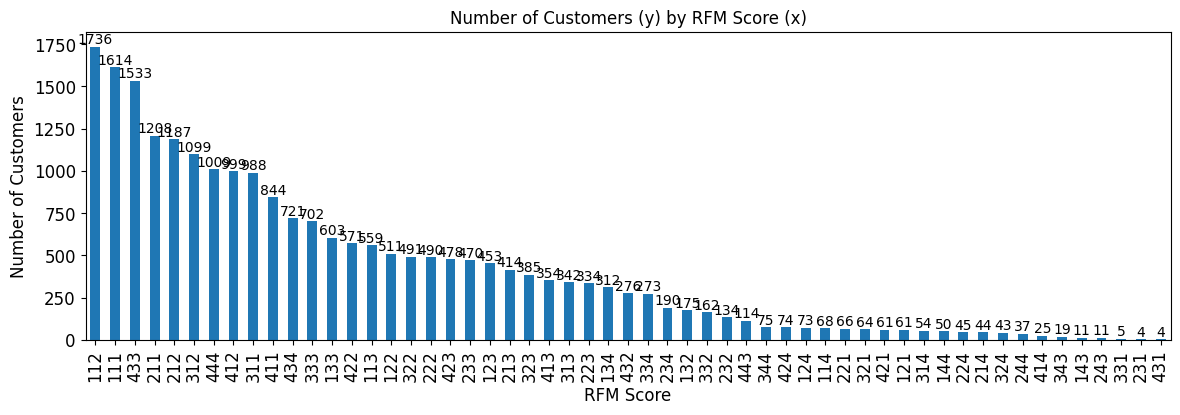

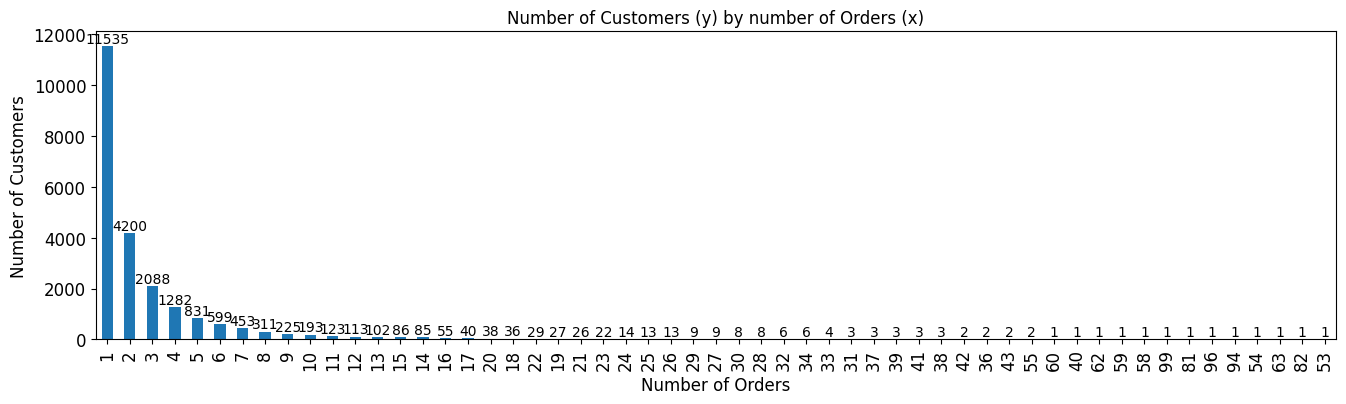

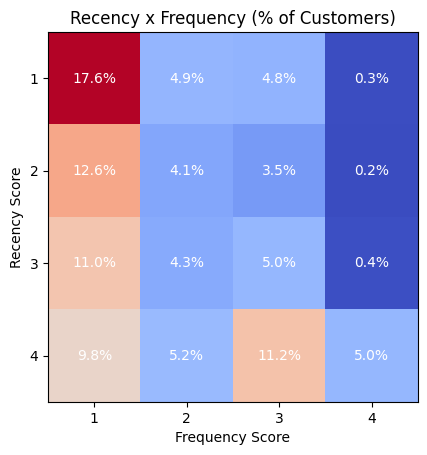

,Segment,NumberOfCustomers,Description,Strategy
0,Almost Lost,37,"Havent purchased for some time, but purchased frequently and spend the most",Agressive price incentives
1,Best Customers,1009,"Customers who bought most recently, most often and spend the most","No price incentives, New products and loyalty programs"
2,Big Spenders,1102,Customers who spend the most,Market your most expensive products
3,Lost Cheap Customers,3922,"Last purchase long ago, purchased few and spend little",Dont spend too much trying to re-acquire
4,Lost Customers,50,"Havent purchased for some time, but purchased frequently and spend the most",Agressive price incentives
5,Loyal Custormes,116,Customers who bought most often,New products and loyalty programs
6,Others,10335,,
7,Recent Customers,6054,Customers who bought most recently,Further segment analysis


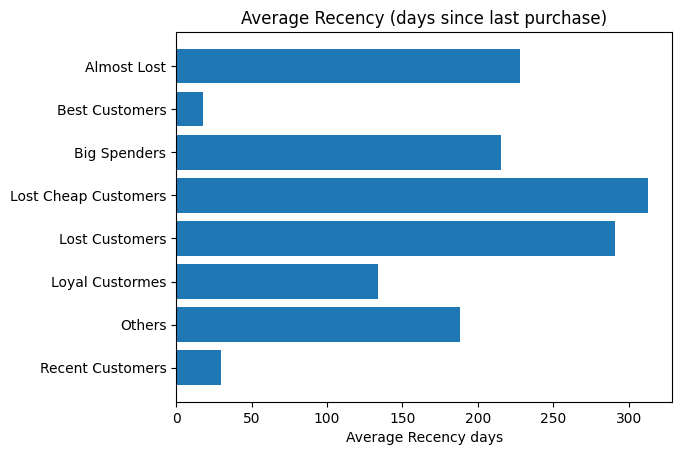

In [ ]:
a = RFM_analysis(df, r_var='Date', f_var='Transaction_ID', m_var='Sales_Amount', sum_tot_val=True, bins=4, option=3, r_tran=None, f_tran=3, m_tran=3)

**Unsupervised cluster analysis**